Best Threshold: 0.1025
Max J Statistic: 0.7776


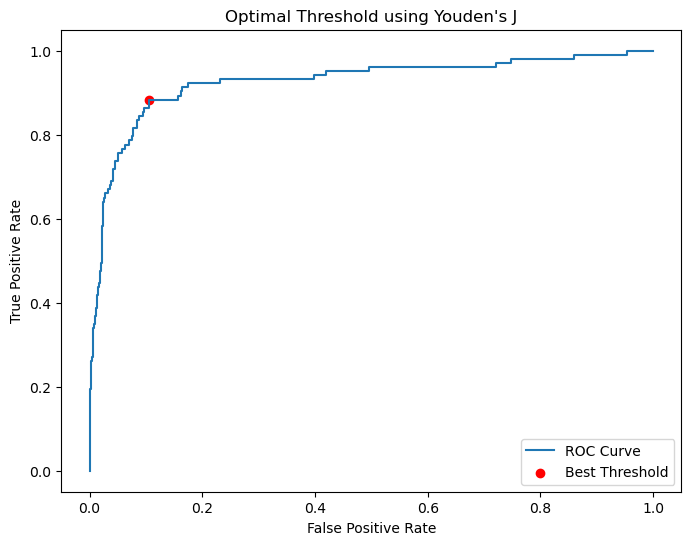

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve

# 1. Generate a sample dataset (Imbalanced: 90% Class 0, 10% Class 1)
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.9, 0.1], random_state=42)

# 2. Train a Logistic Regression model
model = LogisticRegression()
model.fit(X, y)

# 3. Predict Probabilities (We need the prob of the Positive class)
y_prob = model.predict_proba(X)[:, 1]

# 4. Calculate ROC Curve components
fpr, tpr, thresholds = roc_curve(y, y_prob)

# 5. Calculate Youden's J Statistic for every threshold
# Formula: J = Sensitivity (TPR) + Specificity (1 - FPR) - 1
# Simplified: J = TPR - FPR
J = tpr - fpr

# 6. Find the Best Threshold
ix = np.argmax(J) # Find the index of the maximum J score
best_thresh = thresholds[ix]

print(f"Best Threshold: {best_thresh:.4f}")
print(f"Max J Statistic: {J[ix]:.4f}")

# Optional: Visualize it
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='red', label='Best Threshold')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Optimal Threshold using Youden\'s J')
plt.legend()
plt.show()